# Import all baisc libraries

In [3]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
stock_data=pd.read_csv('/content/drive/My Drive/Datasets/Twitter Stocks/stock_data.csv')
stock_data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


# Data Exploration

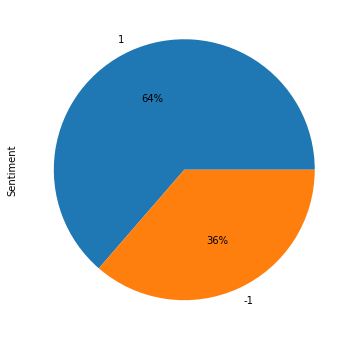

In [6]:
stock_data.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Data Cleaning
Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. However, before cleaning the tweets, let's divide our dataset into feature and label sets.

Our feature set will consist of tweets only. If we look at our dataset, the 1st column contains the tweet text. Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column . To create a feature and a label set, we can use the iloc method off the pandas data frame.

In [7]:
features = stock_data.iloc[:, 0].values
labels = stock_data.iloc[:, 1].values


we start by removing all the special characters from the tweets. The regular expression re.sub(r'\W', ' ', str(features[sentence])) does that.

Next, we remove all the single characters left as a result of removing the special character using the re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature) regular expression. For instance, if we remove special character ' from Rhishi's and replace it with space, we are left with Rhishi s. Here s has no meaning, so we remove it by replacing all single characters with a space.

However, if we replace all single characters with space, multiple spaces are created. Therefore, we replace all the multiple spaces with single spaces using re.sub(r'\s+', ' ', processed_feature, flags=re.I) regex. Furthermore, if your text string is in bytes format a character b is appended with the string. The above script removes that using the regex re.sub(r'^b\s+', '', processed_feature).

Finally, the text is converted into lowercase using the lower() function.


In [8]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    
processed_features

['kickers on my watchlist xide tit soq pnk cpw bpz aj trade method 1 or method 2 see prev posts',
 'user aap movie 55 return for the fea geed indicator just 15 trades for the year awesome ',
 'user d be afraid to short amzn they are looking like near monopoly in ebooks and infrastructure as service',
 'mnta over 12 00 ',
 'oi over 21 37 ',
 'pgnx over 3 04 ',
 'aap user if so then the current downtrend will break otherwise just short term correction in med term downtrend ',
 'monday relative weakness nyx win tie tap ice int bmc aon chk biib ',
 'goog ower trend line channel test volume support ',
 'aap will watch tomorrow for ong entry ',
 'i assuming fcx opens tomorrow above the 34 25 trigger buy still very much like this setup ',
 'it really worries me how everyone expects the market to rally now usually exact opposite happens every time we shall see soon bac spx jpm',
 'aap gamco arry haverty apple is extremely cheap great video ',
 'user maykiljil posted that agree that msft is goi

# TF-IDF using the Scikit-Learn Library
Python's Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. 

we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

# Dividing Data into Training and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)


# Training our model

In [19]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## making prediction 

In [20]:
predictions = text_classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))


[[274 143]
 [110 632]]
accuracy score 0.7817083692838654


# Lets use countvectorizer


In [22]:
features = stock_data.iloc[:, 0].values
labels = stock_data.iloc[:, 1].values

In [23]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    
processed_features

['kickers on my watchlist xide tit soq pnk cpw bpz aj trade method 1 or method 2 see prev posts',
 'user aap movie 55 return for the fea geed indicator just 15 trades for the year awesome ',
 'user d be afraid to short amzn they are looking like near monopoly in ebooks and infrastructure as service',
 'mnta over 12 00 ',
 'oi over 21 37 ',
 'pgnx over 3 04 ',
 'aap user if so then the current downtrend will break otherwise just short term correction in med term downtrend ',
 'monday relative weakness nyx win tie tap ice int bmc aon chk biib ',
 'goog ower trend line channel test volume support ',
 'aap will watch tomorrow for ong entry ',
 'i assuming fcx opens tomorrow above the 34 25 trigger buy still very much like this setup ',
 'it really worries me how everyone expects the market to rally now usually exact opposite happens every time we shall see soon bac spx jpm',
 'aap gamco arry haverty apple is extremely cheap great video ',
 'user maykiljil posted that agree that msft is goi

We uses CountVectorizer class from the sklearn.feature_extraction.text library. There are some important parameters that are required to be passed to the constructor of the class. The first parameter is the max_features parameter, which is set to 1500. This is because when you convert words to numbers using the bag of words approach, all the unique words in all the documents are converted into features. All the documents can contain tens of thousands of unique words. But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. Therefore we set the max_features parameter to 1500, which means that we want to use 1500 most occurring words as features for training our classifier.

The next parameter is min_df and it has been set to 5. This corresponds to the minimum number of documents that should contain this feature. So we only include those words that occur in at least 5 documents. Similarly, for the max_df, feature the value is set to 0.7; in which the fraction corresponds to a percentage. Here 0.7 means that we should include only those words that occur in a maximum of 70% of all the documents. Words that occur in almost every document are usually not suitable for classification because they do not provide any unique information about the document.

Finally, we remove the stop words from our text since, in the case of sentiment analysis, stop words may not contain any useful information. To remove the stop words we pass the stopwords object from the nltk.corpus library to the stop_wordsparameter.


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

processed_features=countvector.fit_transform(processed_features).toarray()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)


In [26]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
predictions = text_classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))


[[300 117]
 [131 611]]
accuracy score 0.7860224331320104
